In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pydot
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/home/felipe/Downloads/Symptoms and COVID Presence.csv')

In [3]:
data = data.dropna()

In [4]:
data.dtypes

Breathing_Problem                          bool
Fever                                      bool
Dry_Cough                                  bool
Sore_throat                                bool
Running_Nose                               bool
Asthma                                     bool
Chronic_Lung_Disease                       bool
Headache                                   bool
Heart_Disease                              bool
Diabetes                                   bool
Hyper_Tension                              bool
Fatigue                                    bool
Gastrointestinal                           bool
Abroad_travel                              bool
Contact_with_COVID_Patient                 bool
Attended_Large_Gathering                   bool
Visited_Public_Exposed_Places              bool
Family_working_in_Public_Exposed_Places    bool
Wearing_Masks                              bool
Sanitization_from_Market                   bool
COVID_19                                

In [5]:
data.describe()

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID_19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,True,True,True,True,True,False,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [6]:
# logic={"Yes":True,"No":False}

# data["Breathing Problem"]=data["Breathing Problem"].map(logic)
# data["Fever"]=data["Fever"].map(logic)
# data["Dry Cough"]=data["Dry Cough"].map(logic)
# data["Sore throat"]=data["Sore throat"].map(logic)
# data["Running Nose"]=data["Running Nose"].map(logic)
# data["Asthma"]=data["Asthma"].map(logic)
# data["Chronic Lung Disease"]=data["Chronic Lung Disease"].map(logic)
# data["Headache"]=data["Headache"].map(logic)
# data["Heart Disease"]=data["Heart Disease"].map(logic)
# data["Diabetes"]=data["Diabetes"].map(logic)
# data["Hyper Tension "]=data["Hyper Tension "].map(logic)
# data["Fatigue"]=data["Fatigue"].map(logic)
# data["Gastrointestinal"]=data["Gastrointestinal"].map(logic)
# data["Abroad travel"]=data["Abroad travel"].map(logic)
# data["Contact with COVID Patient"]=data["Contact with COVID Patient"].map(logic)
# data["Attended Large Gathering"]=data["Attended Large Gathering"].map(logic)
# data["Visited Public Exposed Places"]=data["Visited Public Exposed Places"].map(logic)
# data["Family working in Public Exposed Places"]=data["Family working in Public Exposed Places"].map(logic)
# data["Wearing Masks"]=data["Wearing Masks"].map(logic)
# data["Sanitization from Market"]=data["Sanitization from Market"].map(logic)
# data["COVID-19"]=data["COVID-19"].map(logic)

In [6]:
data

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market,COVID_19
0,True,True,True,True,True,False,False,False,False,True,...,True,True,False,True,False,True,True,False,False,True
1,True,True,True,True,False,True,True,True,False,False,...,True,False,False,False,True,True,False,False,False,True
2,True,True,True,True,True,True,True,True,False,True,...,True,True,True,False,False,False,False,False,False,True
3,True,True,True,False,False,True,False,False,True,True,...,False,False,True,False,True,True,False,False,False,True
4,True,True,True,True,True,False,True,True,True,True,...,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,True,True,False,True,True,True,True,False,False,False,...,True,True,False,False,False,False,False,False,False,True
5430,True,True,True,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
5431,True,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5432,True,True,True,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
predictors = data[[
    'Breathing_Problem','Fever','Dry_Cough','Sore_throat','Running_Nose','Asthma','Chronic_Lung_Disease','Headache',
    'Heart_Disease','Diabetes','Hyper_Tension','Fatigue','Gastrointestinal','Abroad_travel','Contact_with_COVID_Patient',
    'Attended_Large_Gathering','Visited_Public_Exposed_Places','Family_working_in_Public_Exposed_Places','Wearing_Masks',
    'Sanitization_from_Market'
]]
targets = data.COVID_19
predictors

,Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places,Wearing_Masks,Sanitization_from_Market
0,True,True,True,True,True,False,False,False,False,True,True,True,True,False,True,False,True,True,False,False
1,True,True,True,True,False,True,True,True,False,False,False,True,False,False,False,True,True,False,False,False
2,True,True,True,True,True,True,True,True,False,True,False,True,True,True,False,False,False,False,False,False
3,True,True,True,False,False,True,False,False,True,True,False,False,False,True,False,True,True,False,False,False
4,True,True,True,True,True,False,True,True,True,True,True,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,True,True,False,True,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False
5430,True,True,True,False,True,True,False,True,False,True,True,True,False,False,False,False,False,False,False,False
5431,True,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
5432,True,True,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False


In [8]:
predictors_labels = ['Breathing_Problem','Fever','Dry_Cough','Sore_throat','Running_Nose','Asthma','Chronic_Lung_Disease','Headache',
    'Heart_Disease','Diabetes','Hyper_Tension','Fatigue','Gastrointestinal','Abroad_travel','Contact_with_COVID_Patient',
    'Attended_Large_Gathering','Visited_Public_Exposed_Places','Family_working_in_Public_Exposed_Places','Wearing_Masks',
    'Sanitization_from_Market']
target_labels = ['True','False']

In [9]:
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(predictors,targets)

In [10]:
arbol = DecisionTreeClassifier()
arbol.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier()

In [13]:
arbol.score(X_test,y_test)

0.9852832965415746

In [14]:
arbol.score(X_entrenamiento,y_entrenamiento)

0.981840490797546

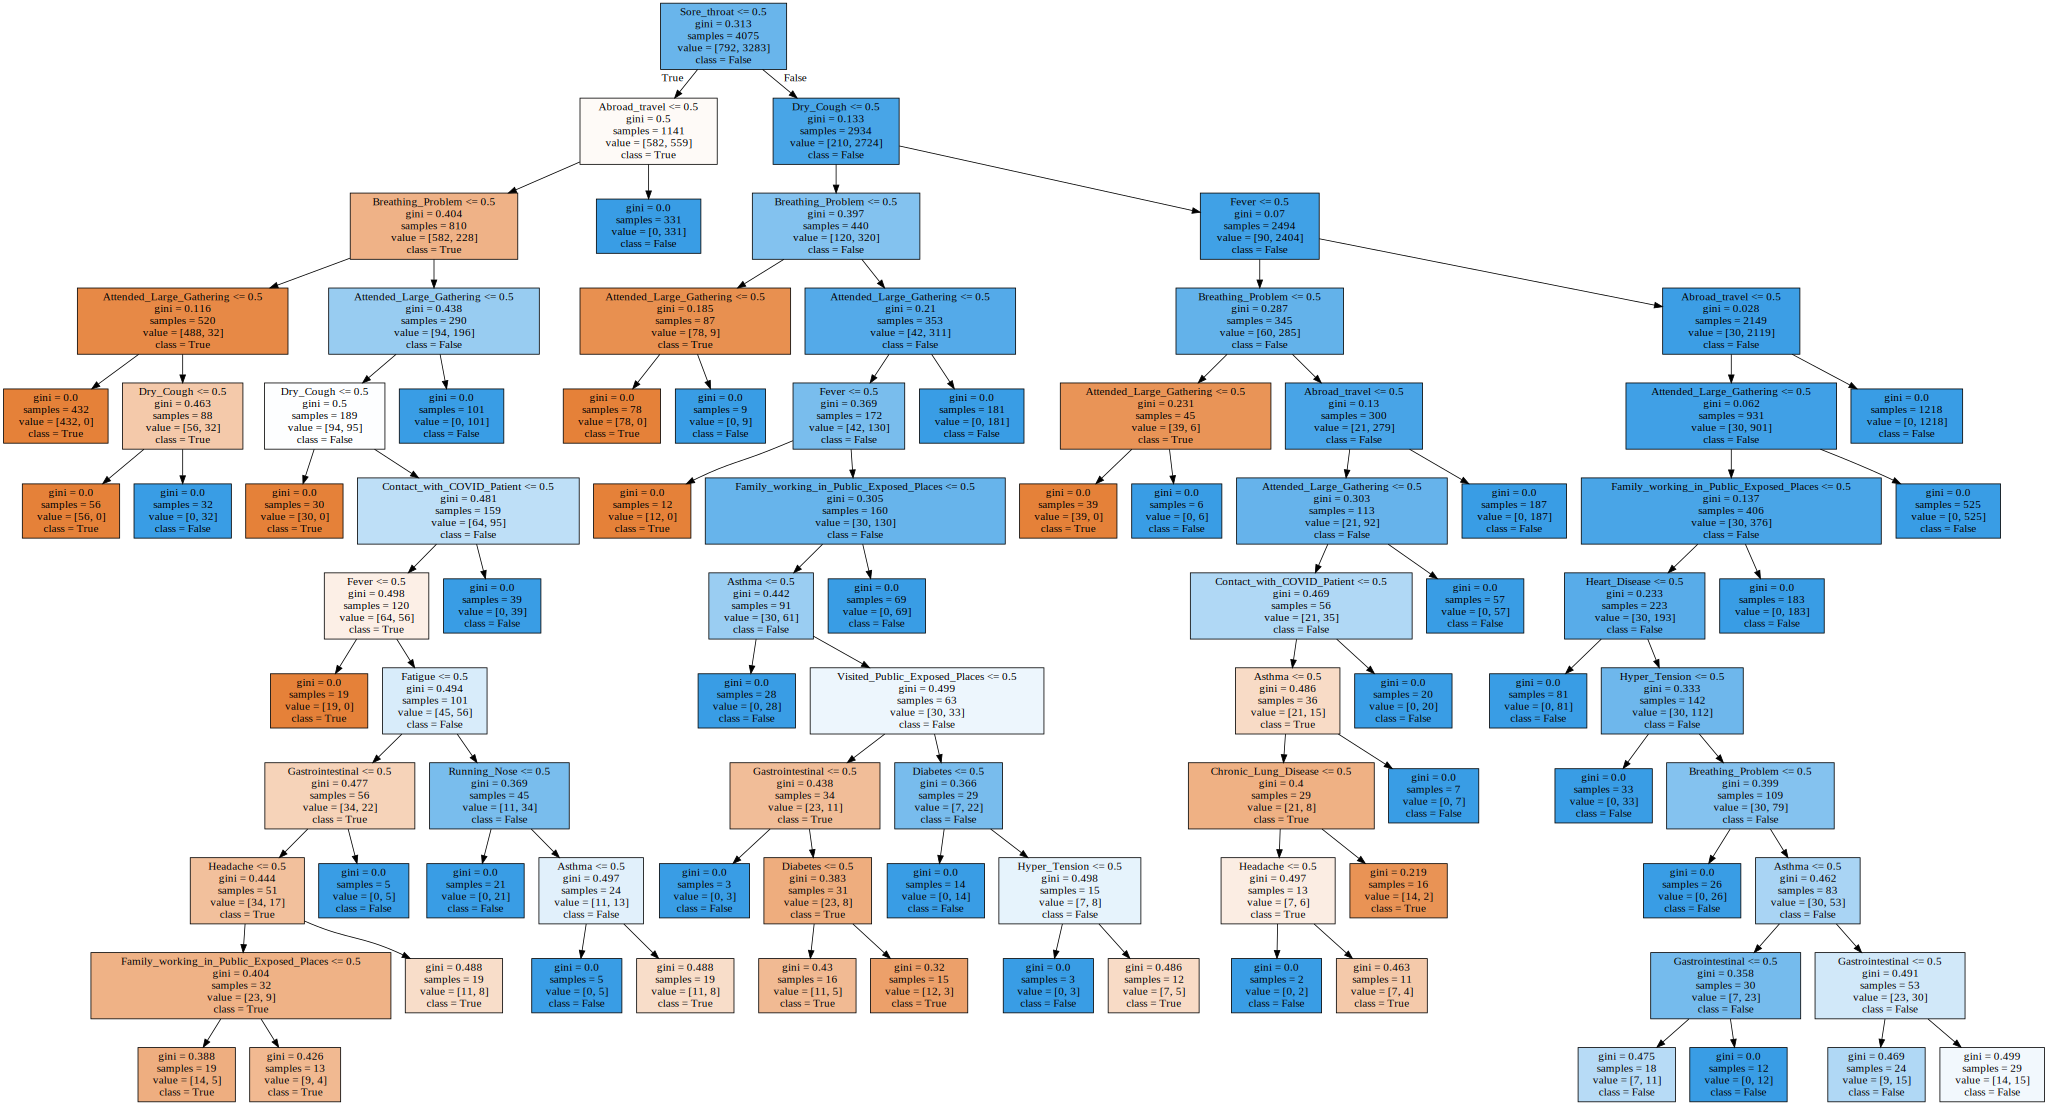

In [15]:
export_graphviz(arbol, out_file='arbol.dot', 
                class_names=target_labels,
                feature_names=predictors_labels,
                impurity=True, filled=True
               )
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [16]:
# Descomentar si se desea generar un archivo png con el arbol para mejor visualizacion
# (graph,)= pydot.graph_from_dot_file('arbol.dot')
# graph.write_png('arbol.png')

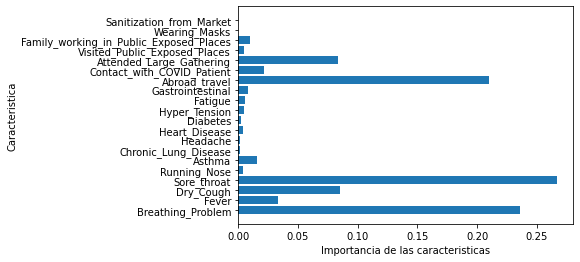

In [16]:
caract = data.shape[1]-1
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),predictors_labels)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristica')
plt.show()

In [18]:
arbol.predict([[False,False,False,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,]])

array([False])